In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DecTreesDataset.csv', index_col='Record_ID')

In [3]:
df

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


In [5]:
df.describe()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [9]:
df['Class']

Record_ID
1        0
2        0
3        0
4        0
5        0
        ..
15129    1
15137    0
15138    0
15139    0
15144    0
Name: Class, Length: 6321, dtype: int64

In [11]:
df.Bidder_ID.value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [12]:
df = df.drop(columns='Bidder_ID')

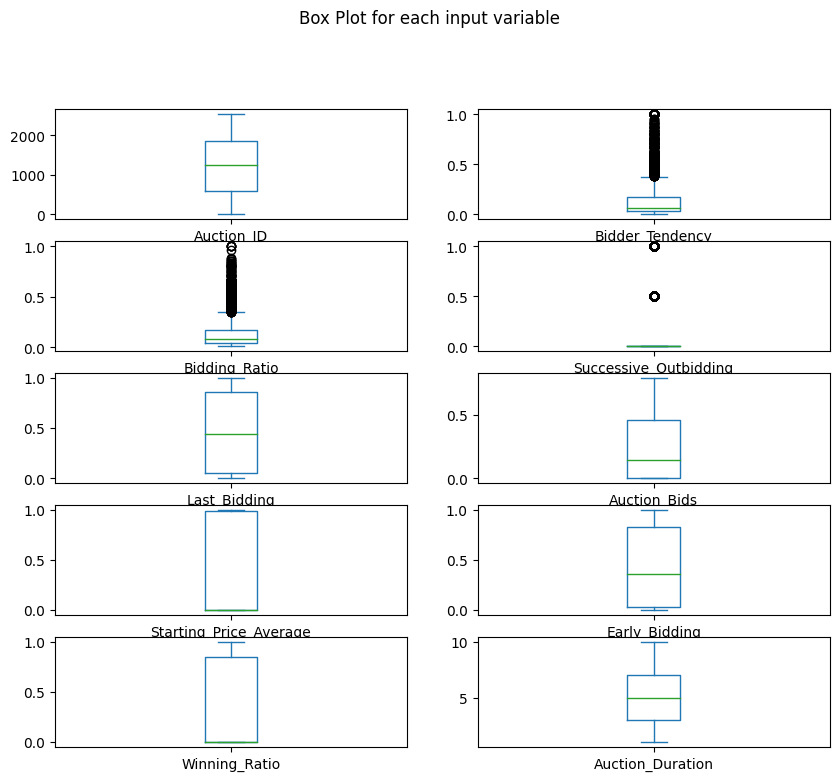

In [13]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Probability Density')

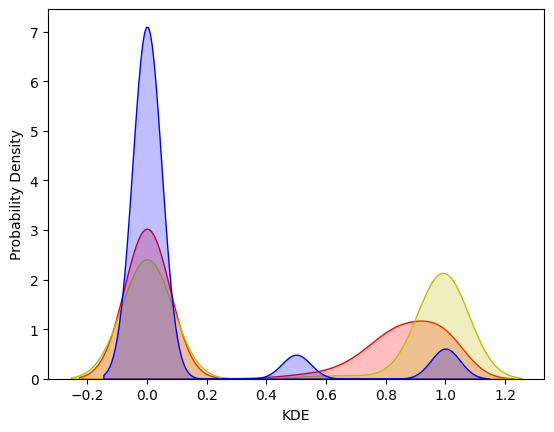

In [14]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64
count    6321.000000
mean        0.103781
std         0.279698
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Successive_Outbidding, dtype: float64
Axes(0.125,0.11;0.775x0.77)


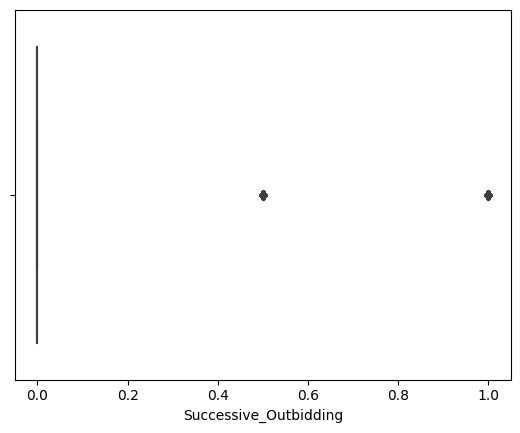

In [15]:
print(df.Successive_Outbidding.value_counts())
print(df.Successive_Outbidding.describe())
print(sns.boxplot(data=df, x='Successive_Outbidding'))

In [16]:
df1 = df[['Auction_ID','Auction_Duration']]
df2 = df.drop(columns = ['Auction_ID','Auction_Duration'])
minmax = MinMaxScaler().fit(df1)
minmax = minmax.transform(df1)

In [17]:
df2 = df2.reset_index()

In [18]:
df1 = pd.DataFrame(minmax, columns = ['Auction_ID','Auction_Duration'])
df1

,Auction_ID,Auction_Duration
0,0.287011,0.444444
1,0.287011,0.444444
2,0.287011,0.444444
3,0.287011,0.444444
4,0.353336,0.666667
...,...,...
6316,0.298066,0.222222
6317,0.977497,0.666667
6318,0.977497,0.666667
6319,0.977497,0.666667


In [21]:
df = df1.join(df2, how='outer')
index = df2['Record_ID']
df = df.set_index('Record_ID')
df

,Auction_ID,Auction_Duration,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
Record_ID,,,,,,,,,,,
1,0.287011,0.444444,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
2,0.287011,0.444444,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
3,0.287011,0.444444,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
4,0.287011,0.444444,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
5,0.353336,0.666667,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...
15129,0.298066,0.222222,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1
15137,0.977497,0.666667,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0
15138,0.977497,0.666667,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0


In [22]:
X = df.drop(columns = 'Class')
y = df['Class']

In [23]:
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [24]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Auction_ID', 'Auction_Duration', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio'],
      dtype='object')

Text(0, 0.5, 'Percentage of importances')

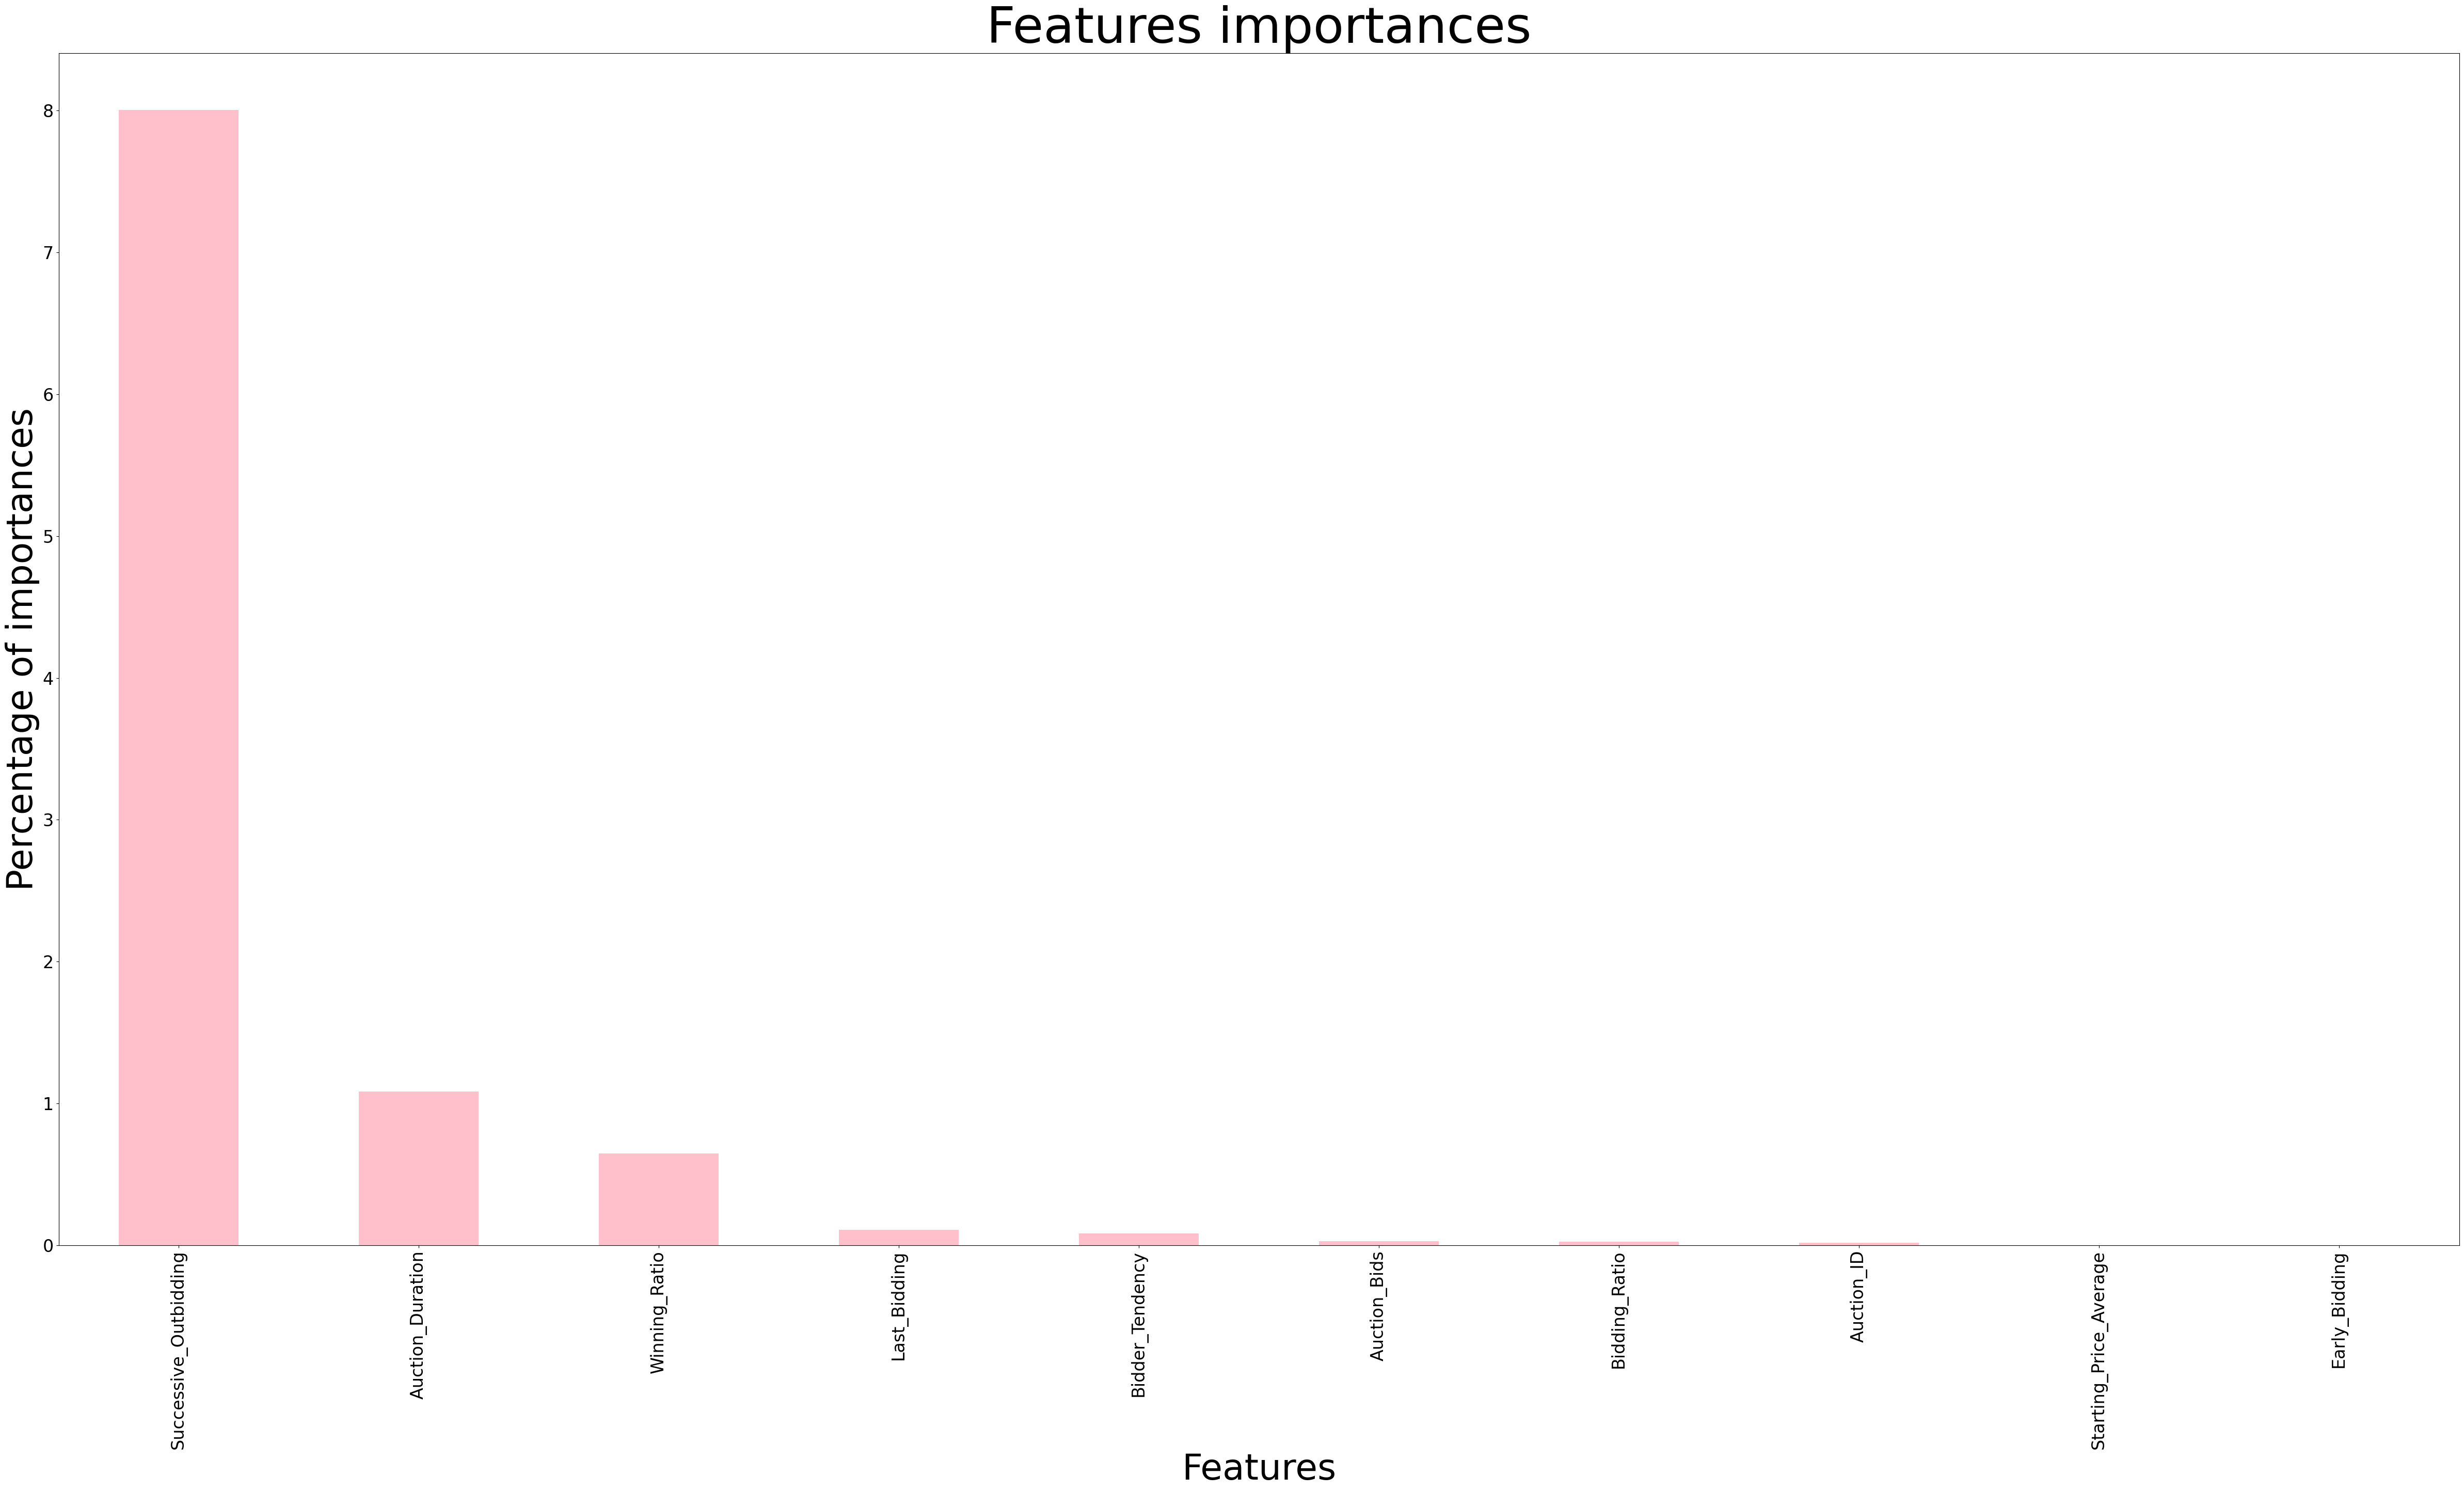

In [25]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'pink')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

Text(0, 0.5, 'Cumulative explained variance')

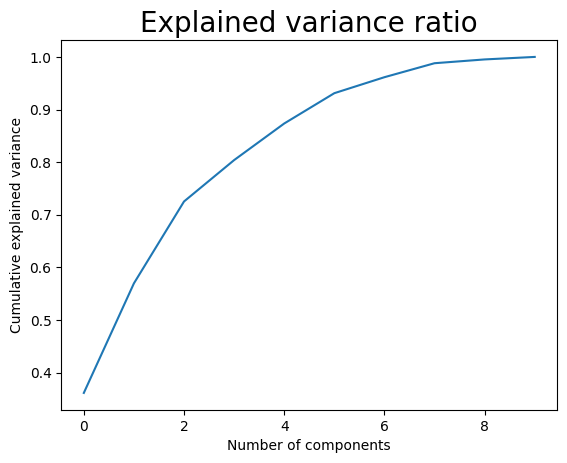

In [26]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [27]:
pca = PCA(n_components=6)
projected = pca.fit_transform(X)

In [28]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36141299, 0.20827264, 0.15559512, 0.07863725, 0.06955875,
       0.05760696])

In [29]:
principal_df = pd.DataFrame(data = projected, columns = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6'], index=index)
df_pca = principal_df.join(y, how='outer')
df_pca.head(5)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,Class
Record_ID,,,,,,,
1,-0.28,-0.28,0.74,-0.19,0.02,-0.28,0
2,-0.34,-0.13,0.82,-0.20,-0.00,-0.47,0
3,-0.37,-0.09,0.87,-0.20,-0.00,-0.46,0
4,-0.28,-0.01,0.80,-0.21,-0.00,-0.48,0
5,-0.82,-0.21,-0.04,-0.04,0.28,-0.09,0


In [31]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X,y)

In [33]:
lda.explained_variance_ratio_

array([1.])

In [34]:
linear_df = pd.DataFrame(data = x_lda, columns = ['LDA 1'], index=index)
df_lda = linear_df.join(y, how='outer')
df_lda.head(10)

,LDA 1,Class
Record_ID,,
1,-0.71,0
2,-0.64,0
3,-0.61,0
4,-0.61,0
5,-0.82,0
8,-0.72,0
10,-0.70,0
12,7.61,1
13,7.40,1


In [36]:
X = df_lda.drop(columns='Class')
y = df_lda['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4108, 1), (2213, 1), (4108,), (2213,))

Logistic Regression:

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [39]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [40]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.979908 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [42]:
logreg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [43]:
print('Training score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(logreg.score(X_test,y_test)))


Training score: 0.979
Testing score: 0.975


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1989
           1       0.80      1.00      0.89       224

    accuracy                           0.97      2213
   macro avg       0.90      0.98      0.94      2213
weighted avg       0.98      0.97      0.98      2213

Axes(0.125,0.11;0.775x0.77)


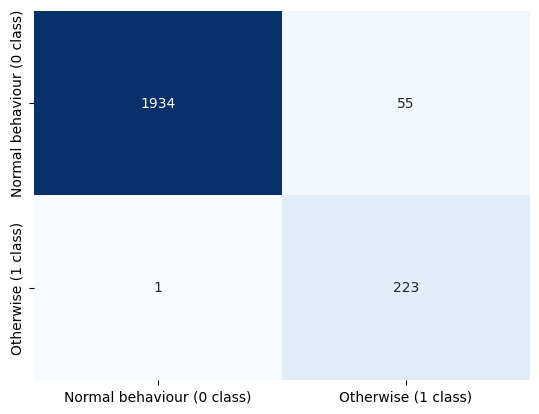

In [44]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],
                 cbar=False, cmap='Blues'))

Decision Tree Classifier:

In [45]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [46]:
depth = range(1, 20)
leaf = range(1, 20)

In [47]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.981649 using {'max_depth': 4, 'min_samples_leaf': 4}


In [49]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [50]:
print('Training score: {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(tree.score(X_test,y_test)))

Training score: 0.984
Testing score: 0.978


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1989
           1       0.83      0.99      0.90       224

    accuracy                           0.98      2213
   macro avg       0.91      0.98      0.95      2213
weighted avg       0.98      0.98      0.98      2213

Axes(0.125,0.11;0.775x0.77)


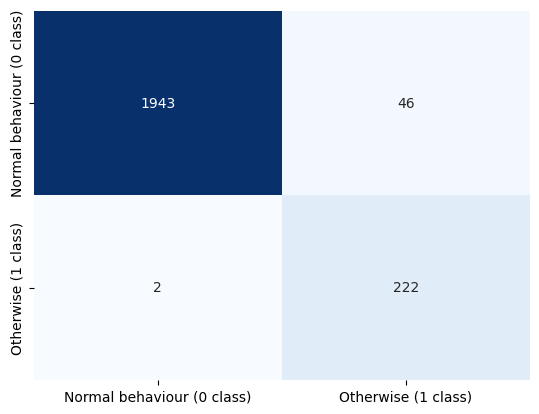

In [51]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],
                 cbar=False, cmap='Blues'))

Thus, we have gotten scores of 97.5% and 97.8% using Logistic regression and Decision Trees, respectively, on the testing data.
Similar values of accuracy on training data and testing data implies that there is no overfitting/ underfitting.